In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [2]:
word = "grail"
sent = "a scratch"

In [10]:
print(word[0])
print(word[0:3])
print(sent[-1])
print(sent[0:-8])
print(sent[-9:-8])
print(word[:3])
print(sent[:])
print(sent[::2])

g
gra
h
a
a
gra
a scratch
asrth


In [11]:
a = "word"
s = "hello {}"

### formatting

In [12]:
s.format(a)

'hello word'

In [13]:
"Some digits of pi : {}".format(3.14)

'Some digits of pi : 3.14'

In [15]:
"Some digits of %(cont)s: %(value).2f" % {"cont": "e", "value": 2.718}

'Some digits of e: 2.72'

## 정규표현식
|  <center>메타문자</center> |  <center>의미</center> |  <center>예시</center> | 
|:--------|:--------:|--------:|
|<center>**[]<br>문자클래스**</center>|<center>[]사이의 문자들과 매치<br>(대괄호 안에는 어떤 문자도 가능) </center> | [abc] → "a", "begin" (O) "test" (X)<br>[a-z]: a~z [a-zA-Z]: a~z, A~Z|
|<center>**\d<br>\D**</center>| <center>숫자(=[0-9])<br>숫자가 아닌 것(=[^0-9]), **특수문자**</center> | <center>[0-7]: 0~7([01234567])</center> |
|<center>**\s<br>\S**</center>| <center>공백 문자 1개 = [\t\n\r\f]<br>공백X = [^\t\n\r\f]</center> | |
|<center>**\w**</center>| <center>문자 + 숫자<br>[a-zA-Z0_9_] (_포함)</center> ||
|<center>**.(점)**</center>| <center>모든 문자(\n문자 제외)</center> | <center>a.b → "akb", "a5b" (O) "aby" (X)<br>a[.]b → a.b : a와 b사이에 .이 1개 이상와야함</center>|
|<center>*****</center>| <center>0번이상 반복</center> | <center>ba*t → bt, bat, baat, ...</center>|
|<center>**+**</center>| <center>1번이상 반복</center> | <center>ba+t → bat, baat, ... (O) bt(X)</center>|
|<center>**{}**</center>| <center>{최소반복횟수, 최대반복횟수}<br>{최소반복횟수, } : 최초 반복회수 이상<br>{, 최대반복횟수} : 최대 반복회수 이하</center> | <center>{1, } : 최소 1번이상 = + <br>{0, } : 최소 0번이상 = *<br>{2} : 반드시 2번 반복<br>ba{2}t → baat<br>ba{2, 5}t → baat, baaat, baaaat, baaaaat</center>|
|<center>**?**</center>| <center>{0, 1}<br>나와도되고 안나와도 된다</center> | <center>ba?t → bt, bat
</center>|

In [16]:
data =  """
kim 990102-1234567
lee 970102-1234567
"""

In [18]:
pat = re.compile("(\d{6})[-]\d{7}") # []: 반드시 포함, \d: digit, {}: 개수, (): 그룹화
pat.sub("\g<1>-*******", data) # \g : 그룹, <>: 그룹 순서

'\nkim 990102-*******\nlee 970102-*******\n'

In [19]:
pat = re.compile("[a-z]")
pat.match("deep")

<re.Match object; span=(0, 1), match='d'>

In [20]:
pat = re.compile("[a-z]+")
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [21]:
pat = re.compile("[a-z]*")
pat.match("deep")

<re.Match object; span=(0, 4), match='deep'>

In [23]:
# hi 뒤에 공백이 오기때문에 deep을 찾을 수 없다
pat = re.compile("[a-z]+") 
pat.match("hi deep")

<re.Match object; span=(0, 2), match='hi'>

In [29]:
# 공백 포함
pat = re.compile("[ a-z]+") 
pat.match("hi deep")

<re.Match object; span=(0, 7), match='hi deep'>

In [30]:
# -를 사용해 범위를 지정해줄 수 있다
pat = re.compile("[ a-z6-8]+") 
pat.match("hi de7ep")

<re.Match object; span=(0, 8), match='hi de7ep'>

In [34]:
pat = re.compile("[ a-z6-8]+") 
res = pat.match("3hi de7ep") # 매치 된 객체를 저장
print(res)

None


In [35]:
pat = re.compile("[ a-z6-8]+") 
res = pat.match("3hi de7ep")
if res:
    print("매치")
else: # None: 매치되지 않는다면, 객체가 저장되지 않았다면
    print("매치 X")

매치 X


In [36]:
pat = re.compile("[ a-z6-8]+") 
res = pat.match("hi de7ep")
if res:
    print("매치")
    print(res.group())
else: # None: 매치되지 않는다면, 객체가 저장되지 않았다면
    print("매치 X")

매치
hi de7ep


In [40]:
pat = re.compile("[a-z]+") 
res = pat.match("3 test") # 앞에서부터 시작해서 매치가 안되는 것을 만나면 멈춤
print(res)
res = pat.search("3 test") # 처음부터 끝까지 어디든지 매치가되는 것(1개)을 찾을 때
print(res)

None
<re.Match object; span=(2, 6), match='test'>


In [45]:
print(pat.findall("life is too short"))
print(pat.findall("7 life is too short"))

['life', 'is', 'too', 'short']
['life', 'is', 'too', 'short']


In [46]:
print(pat.search("life is too short"))
print(pat.search("7 life is too short"))

<re.Match object; span=(0, 4), match='life'>
<re.Match object; span=(2, 6), match='life'>


In [47]:
print(pat.match("life is too short"))
print(pat.match("7 life is too short"))

<re.Match object; span=(0, 4), match='life'>
None


In [49]:
res = pat.finditer("7 life is too short")
print(res)
for i in res:
    print(i)

<re.Match object; span=(2, 6), match='life'>
<re.Match object; span=(7, 9), match='is'>
<re.Match object; span=(10, 13), match='too'>
<re.Match object; span=(14, 19), match='short'>


In [56]:
res = pat.match("hello")
print(res)
print(res.group())
print(res.start())
print(res.end())
print(res.span())

<re.Match object; span=(0, 5), match='hello'>
hello
0
5
(0, 5)


In [60]:
res = re.match("[a-z]+", "test")
res

<re.Match object; span=(0, 4), match='test'>

In [65]:
p1 = re.compile("[abcd]") # a-d
p2 = re.compile("abcd") # "abcd"
res1 = p1.match("a") 
res2 = p2.match("a")
print(res1, res2)

<re.Match object; span=(0, 1), match='a'> None


In [69]:
p = re.compile("hello|hi") # hello 또는 hi인 경우 매치
res = p.findall("hellohi")
print(res)

['hello', 'hi']


In [74]:
pat = re.compile("Life")
res = pat.match("Life is too short")
print(res)

<re.Match object; span=(0, 4), match='Life'>


In [73]:
res = pat.match("My Life is too short")
print(res)

None


In [75]:
res = pat.search("My Life is too short")
print(res)

<re.Match object; span=(3, 7), match='Life'>


In [76]:
res = pat.findall("My Life is too short Life")
print(res)

['Life', 'Life']


In [77]:
pat = re.compile("^Life") # 문자열 이작이 Life이다
res = pat.match("Life is too short")
print(res)

<re.Match object; span=(0, 4), match='Life'>


In [78]:
pat = re.compile("^Life")  
res = pat.match("My Life is too short")
print(res)

None


In [80]:
pat = re.compile("^Life")  
res = pat.search("My Life is too short")
print(res)

None


In [389]:
pat = re.compile("short$") # 문자열 끝이 short이다
res = pat.search("Life is too short")
print(res)

short


In [384]:
pat = re.compile("short$") # short으로 끝나느지 맨 마지막만 본다
res = pat.search("Life is too short Life")
print(res)

None


그룹 ( ) <br>
1. 정규식 구분 <br>
2. 하나의 정규식을 의미있는 단위로 분할 <br>
3. 특정문자열이 반복되는지 반복여부 확인

In [84]:
p = re.compile("ABC")
res = p.match("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [85]:
p = re.compile("ABC")
res = p.search("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [86]:
p = re.compile("ABC")
res = p.findall("ABCABCABC DEF")
print(res)

['ABC', 'ABC', 'ABC']


In [87]:
p = re.compile("[ABC]") # A-C
res = p.match("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 1), match='A'>


In [88]:
p = re.compile("[ABC]+")
res = p.match("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [91]:
p = re.compile("(ABC)+") # ABC가 여러번 반복
res = p.match("ABCABCABC DEF")
print(res)

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [123]:
# 찾고자하는 패턴: 이름 + " " + 전화번호
pat = re.compile("(\w+)\s+(\d+[-](\d+)[-]\d+)")
res = pat.match("kim 010-1234-5678")
print(res)
print(res.group())
print(res.group(0))
print(res.group(1)) # 매치된 1번째 그룹
print(res.group(2)) # 매치된 2번째 그룹
print(res.group(3)) # 매치된 3번째 그룹 - 왼쪽에서부터  (을 만나면 그룹 생성

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678
kim 010-1234-5678
kim
010-1234-5678
1234


In [124]:
re.match("[0-9]*", "1234")

<re.Match object; span=(0, 4), match='1234'>

In [125]:
re.match("[0-9]+", "1234")

<re.Match object; span=(0, 4), match='1234'>

In [126]:
re.match("[0-9]*", "abcd")

<re.Match object; span=(0, 0), match=''>

In [129]:
print(re.match("a*b", "a"))

None


In [130]:
print(re.match("a*b", "b"))

<re.Match object; span=(0, 1), match='b'>


In [131]:
print(re.match("a*b", "aab"))

<re.Match object; span=(0, 3), match='aab'>


In [132]:
print(re.match("K?", "K"))

<re.Match object; span=(0, 1), match='K'>


In [133]:
print(re.match("K?", "K9"))

<re.Match object; span=(0, 1), match='K'>


In [136]:
print(re.match("K.", "K99")) # . = 문자 1개

<re.Match object; span=(0, 2), match='K9'>


In [138]:
print(re.match("k{3}", "kkabc")) 

None


In [139]:
print(re.match("k{3}", "kkkabc")) 

<re.Match object; span=(0, 3), match='kkk'>


In [140]:
print(re.match("(k){3}", "kkkabc")) 

<re.Match object; span=(0, 3), match='kkk'>


In [141]:
print(re.match("(hi){3}", "hihihihikkkabc")) 

<re.Match object; span=(0, 6), match='hihihi'>


In [151]:
print(re.match("(hi)", "hihihihikkkabc")) 

<re.Match object; span=(0, 2), match='hi'>


In [152]:
print(re.match("[0-9]{3}", "01-123-4567")) 

None


In [157]:
# print(re.match("[0-9]{1, 3}", "01-123-4567")) (X)
print(re.match("[0-9]{1,3}", "01-123-4567")) 

<re.Match object; span=(0, 2), match='01'>


In [158]:
print(re.match("[a-zA-Z0-9]+", "hello113")) 

<re.Match object; span=(0, 8), match='hello113'>


In [160]:
print(re.match("[가-힣]+", "딥러닝")) 

<re.Match object; span=(0, 3), match='딥러닝'>


In [163]:
print(re.match("[^A-Z]+", "heLlo")) # [^A-Z] 대문자 제외

<re.Match object; span=(0, 2), match='he'>


In [165]:
print(re.match("^[A-Z]+", "heLlo")) # ^[A-Z] 대문자로 시작\

None


In [170]:
print(re.match("[a-zA-Z]+[0-9]+$", "dlf7"))
print(re.match("[a-zA-Z]+[0-9]+$", "dlf7564"))
print(re.match("[a-zA-Z]+[0-9]+$", "dlf7564abd"))

<re.Match object; span=(0, 4), match='dlf7'>
<re.Match object; span=(0, 7), match='dlf7564'>
None


In [173]:
print(re.search("\*+", "100 ** 2")) # 메타문자: 정규 표현식에 사용되는 특별한 의미의 특수문자

<re.Match object; span=(4, 6), match='**'>


In [176]:
res = re.search("(\d+) (\d+)", "10 200")
res.groups()

('10', '200')

In [181]:
res = re.search("(?P<ln>\d+) (?P<sn>\d+) (?P<tn>\d+)", "010 123 4567") # (?P<그룹명>정규식)
res.group("ln")

'010'

In [185]:
re.findall("\d+", "1 2 abc 3 abc 4 5 abc")

['1', '2', '3', '4', '5']

In [214]:
print(re.search("\w+\.?[a-zA-Z]+$", "hello.world"))
print(re.search("\w+\.?[a-zA-Z]+$", "hello.1434"))
print(re.search("\w+\.?[a-zA-Z]+$", "hello"))

<re.Match object; span=(0, 11), match='hello.world'>
None
<re.Match object; span=(0, 5), match='hello'>


### 문자열 함수

In [215]:
"asfd".capitalize()

'Asfd'

In [216]:
"asfdasdf".count("f")

2

In [218]:
"asfdasdf".startswith("as")

True

In [221]:
"asfdasdf".endswith("df")

True

In [222]:
"asfdasdf".find("df")

6

In [223]:
"asfdasdf".index("d")

3

In [224]:
"asfdasdf".isalpha()

True

In [225]:
"asfd asdf".isalpha()

False

In [228]:
"222".isdecimal()

True

In [229]:
"I am 23".isalnum()

False

In [230]:
"Iam23".isalnum()

True

In [231]:
" asdfasdf asdf  ".strip()

'asdfasdf asdf'

## apply()

In [233]:
df = pd.DataFrame({"a": [1, 2, 3], "b":[2, 3, 4]})
df

,a,b
0,1,2
1,2,3
2,3,4


In [236]:
def mysq(x):
    return x**2

def myexp(x, n):
    return x**n

In [235]:
df.apply(mysq)

,a,b
0,1,4
1,4,9
2,9,16


In [239]:
df["a"].apply(mysq)

0    1
1    4
2    9
Name: a, dtype: int64

In [240]:
df.apply(myexp, n=3)

,a,b
0,1,8
1,8,27
2,27,64


In [238]:
df.apply(lambda x: myexp(x, 3))

,a,b
0,1,8
1,8,27
2,27,64


In [241]:
def prn(x):
    print(x)

In [242]:
df.apply(prn, axis=0) # default: axis=0

0    1
1    2
2    3
Name: a, dtype: int64
0    2
1    3
2    4
Name: b, dtype: int64


a    None
b    None
dtype: object

In [244]:
titanic = sns.load_dataset("titanic")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [270]:
def count_missing(data):
    null_data = pd.isnull(data)
    null_count = np.sum(null_data)
    return null_count 

def prop_missiong(data):
    n = count_missing(data) # 각 col 당 결측치
    return n / data.size

In [271]:
cmis_col = titanic.apply(count_missing, axis=0)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [272]:
titanic.apply(prop_missiong)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [273]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [390]:
titanic.apply(count_missing, axis=1).head() # 각 행에 Nan이 얼마나 있나 출력

0    1
1    0
2    1
3    0
4    1
dtype: int64

## groupby()와 agg()

In [277]:
titanic["num_mission"] = titanic.apply(count_missing, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,num_mission
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [280]:
df = pd.read_csv("./res/gapminder.tsv", sep="\t")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [281]:
df.groupby("year").lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [282]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [297]:
y1952 = df[df.year == 1952]
y1952_mean = y1952.lifeExp.mean() # 1952년의 기대수ㅛy1952.lifeExp.mean() # 1952년의 기대수명
y1952_mean

49.05761971830987

In [289]:
df.groupby("year").lifeExp.agg(np.max)

year
1952    72.670
1957    73.470
1962    73.680
1967    74.160
1972    74.720
1977    76.110
1982    77.110
1987    78.670
1992    79.360
1997    80.690
2002    82.000
2007    82.603
Name: lifeExp, dtype: float64

In [290]:
df.groupby("year").lifeExp.agg(np.min)

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    35.400
1977    31.220
1982    38.445
1987    39.906
1992    23.599
1997    36.087
2002    39.193
2007    39.613
Name: lifeExp, dtype: float64

In [291]:
df.groupby("year").lifeExp.agg(np.size)

year
1952    142.0
1957    142.0
1962    142.0
1967    142.0
1972    142.0
1977    142.0
1982    142.0
1987    142.0
1992    142.0
1997    142.0
2002    142.0
2007    142.0
Name: lifeExp, dtype: float64

In [305]:
def myMean(v):
    n = len(v)
#     sum = 0
#     for val in v:
#         sum += val
    return np.sum(v)/n

In [304]:
df.groupby("year").lifeExp.agg(myMean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [306]:
gm = df.lifeExp.mean()

In [317]:
def mean_diff(v, mean):
    n = len(v)
    return gm - np.sum(v)/n

In [318]:
df.groupby("year").lifeExp.agg(mean_diff, mean=gm)

year
1952    10.416820
1957     7.967038
1962     5.865190
1967     3.796150
1972     1.827053
1977    -0.095718
1982    -2.058758
1987    -3.738173
1992    -4.685899
1997    -5.540237
2002    -6.220483
2007    -7.532983
Name: lifeExp, dtype: float64

In [319]:
df.groupby("year").lifeExp.agg([np.std, np.mean, np.count_nonzero])

,std,mean,count_nonzero
year,,,
1952,12.225956,49.057620,142.0
1957,12.231286,51.507401,142.0
1962,12.097245,53.609249,142.0
1967,11.718858,55.678290,142.0
1972,11.381953,57.647386,142.0
1977,11.227229,59.570157,142.0
1982,10.770618,61.533197,142.0
1987,10.556285,63.212613,142.0
1992,11.227380,64.160338,142.0


In [322]:
df.groupby("year").lifeExp.agg({"lifeExp std": np.std, "lifExp mean": np.mean, "lifeExp nonzero":np.count_nonzero})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,lifeExp std,lifExp mean,lifeExp nonzero
year,,,
1952,12.225956,49.057620,142.0
1957,12.231286,51.507401,142.0
1962,12.097245,53.609249,142.0
1967,11.718858,55.678290,142.0
1972,11.381953,57.647386,142.0
1977,11.227229,59.570157,142.0
1982,10.770618,61.533197,142.0
1987,10.556285,63.212613,142.0
1992,11.227380,64.160338,142.0


In [340]:
def zscore(x):
    return (x - x.mean())/ x.std()

## groupby()와 transform()

In [391]:
df.groupby("year").lifeExp.transform(zscore).head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

In [345]:
names1880 = pd.read_csv("./res/babynames/yob1880.txt",
                       names=["name", "sex", "births"])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [346]:
names1880.shape

(2000, 3)

In [347]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [350]:
names1880.groupby("sex").births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [352]:
years = range(1880, 2011)
pieces = []
for year in years:
    path = "./res/babynames/yob%d.txt" % year 
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)
    

In [354]:
len(pieces)

131

In [392]:
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [372]:
# 연도와 성별로 데이터 재구성
total_births = pd.pivot_table(names, index="year", columns="sex", values="births", aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


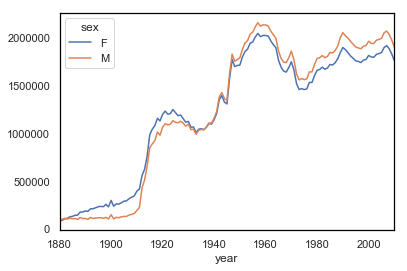

In [375]:
total_births.plot()